# Estimar esforço em desenvolvimento de software com redes neurais profundas

Desenvolvimento do Trabalho de Graduação


## Dependências

- Python 3.6
- numpy >= 1.15.4
- pandas >= 0.23.4
- matplotlib >= 2.2.3
- statsmodel >= 0.9.0
- seaborn >= 0.9.0

In [455]:
from glob import glob
from collections import defaultdict

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

import keras


sns.set()

## Constantes globais de configurações

In [247]:
caminho_dados = 'dados/cocomo/'
dim_inicial = 3
dim_intermediaria = 2

## Carregamento e pre-processamento dos dados

In [552]:
def carregar_tudo(caminho_dados):
    dados = {}
    for arquivo in glob(caminho_dados+'/*.csv'):
        ticker = arquivo.split('/')[-1].split('.')[0]
        tabela = pd.read_csv(arquivo, skipinitialspace=True)
        dados[ticker] = tabela
    return dados

dados = carregar_tudo(caminho_dados)
dados.keys()

dict_keys(['cocomo_nasa2', 'cocomo_sdr', 'cocomo_nasa2000', 'cocomo81', 'cocomo_nasa'])

In [409]:
dados['cocomo81'].head()

,ID,PREC,FLEX,RESL,TEAM,PMAT,RELY,DATA,CPLX,RUSE,...,APEX,PLEX,LTEX,TOOL,SITE,SCED,KLOC,Effort,Defects,Months
0,1,h,h,h,vh,vl,l,vh,vl,n,...,l,l,n,vl,h,n,113.0,2040.0,13027,38.4
1,2,h,h,h,vh,vl,l,vh,l,n,...,h,h,h,vl,h,n,293.0,1600.0,25229,48.6
2,3,h,h,h,vh,n,n,vh,l,n,...,vh,h,h,l,h,n,132.0,243.0,3694,28.7
3,4,h,h,h,vh,vl,vl,vh,vl,n,...,h,n,h,vl,h,n,60.0,240.0,5688,28.0
4,5,h,h,h,vh,vl,l,l,n,n,...,n,h,h,vl,h,n,16.0,33.0,970,14.3


In [509]:
dados['cocomo_nasa'].head()

,RELY,DATA,CPLX,TIME,STOR,VIRT,TURN,ACAP,AEXP,PCAP,VEXP,LEXP,MODP,TOOL,SCED,KLOC,Effort
0,n,h,vh,n,n,l,n,h,n,vh,l,n,h,n,l,70.0,278.0
1,vh,h,h,vh,vh,n,n,vh,vh,vh,n,h,h,h,l,227.0,1181.0
2,n,h,h,vh,h,l,h,h,n,h,l,h,h,n,l,177.9,1248.0
3,h,l,h,n,n,l,l,n,n,n,n,h,h,n,l,115.8,480.0
4,h,l,h,n,n,l,l,n,n,n,n,h,h,n,l,29.5,120.0


In [508]:
dados['cocomo_nasa2'].head()

,ID,projectname,cat2,forg,center,year,mode,RELY,DATA,CPLX,...,ACAP,AEXP,PCAP,VEXP,LEXP,MODP,TOOL,SCED,KLOC,Effort
0,1,de,avionicsmonitoring,g,2,1979,semidetached,h,l,h,...,n,n,n,n,h,h,n,l,25.9,117.6
1,2,de,avionicsmonitoring,g,2,1979,semidetached,h,l,h,...,n,n,n,n,h,h,n,l,24.6,117.6
2,3,de,avionicsmonitoring,g,2,1979,semidetached,h,l,h,...,n,n,n,n,h,h,n,l,7.7,31.2
3,4,de,avionicsmonitoring,g,2,1979,semidetached,h,l,h,...,n,n,n,n,h,h,n,l,8.2,36.0
4,5,de,avionicsmonitoring,g,2,1979,semidetached,h,l,h,...,n,n,n,n,h,h,n,l,9.7,25.2


In [590]:
dados['cocomo_sdr']

,ID,PREC,FLEX,RESL,TEAM,PMAT,RELY,DATA,CPLX,RUSE,...,PCAP,PCON,APEX,PLEX,LTEX,TOOL,SITE,SCED,KLOC,Effort
0,1,vh,n,l,h,vl,n,n,l,l,...,vh,vh,vh,h,h,h,l,n,3.000,1.2
1,2,vh,n,l,vh,vl,h,n,l,n,...,h,vh,vh,vh,vh,h,vl,h,2.000,2.0
2,3,xh,n,l,h,vl,h,vh,l,n,...,h,vh,vh,vh,vh,h,vl,h,4.250,4.5
3,4,xh,h,h,h,n,h,h,vh,l,...,h,vl,h,vh,h,n,h,h,10.000,3.0
4,5,n,n,l,h,n,l,n,vh,n,...,h,h,n,n,n,n,h,l,15.000,4.0
5,6,vh,l,xh,xh,h,l,l,n,l,...,vh,h,n,h,h,vl,xh,l,40.530,22.0
6,7,xh,vh,xh,n,h,l,l,l,n,...,vh,vh,n,vh,vh,vl,h,l,4.050,2.0
7,8,n,vl,vh,n,l,l,vh,vl,h,...,h,vh,n,n,n,n,vh,n,31.845,5.0
8,9,vl,vl,n,vl,l,vl,n,l,vh,...,h,vh,h,h,h,n,h,n,114.280,18.0
9,10,n,vl,vh,l,l,vl,h,n,vh,...,vh,vh,h,vh,h,n,n,l,23.106,4.0


In [534]:
# nasa2000 = dados['cocomo_nasa2000'][params.index] # OLD
# for nome, valores in params[params.columns[1:]].iterrows():
#     novo = nasa2000.astype({nome: 'object'})
#     for categoria, valor in valores.iteritems():
#         novo.loc[abs(nasa2000.loc[:, nome] - valor) < 0.001, nome] = categoria.lower()
#     nasa2000 = novo
# for coluna in nasa2000.columns:
#     dados['cocomo_nasa2000'] = dados['cocomo_nasa2000'].astype({coluna: 'object'})
#     dados['cocomo_nasa2000'].loc[:, coluna] = nasa2000.loc[:, coluna]
# cheios = nasa2000.isin([a.lower() for a in params.columns[1:]]).sum(axis=1)==nasa2000.shape[1]
# nasa2000limpa=dados['cocomo_nasa2000'].loc[cheios,:]
# nasa2000limpa.to_csv('cocomo_nasa2000l.csv', index=False)
dados['cocomo_nasa2000'].head()

,ID,Unusual Flag,Nasa60?,ProjectID,PARENT,ELEMENT,Category,F or G,Center,Start Year,...,End Date,Delivered Logical KLOC,Physical Delivered KLOC,Ported KLOC,%DM,%CM,%IM,Actual Schedule,productivity per day,KLOC
0,1,0,1,A,AGSA,ADS,Avionics Monitoring,G,2,1979,...,7/18/81,29.70,33.0,0,0.0,0.0,0.0,0,9.910714,25.9
1,2,0,1,A,AGSB,ADS,Avionics Monitoring,G,2,1979,...,7/18/81,27.99,31.1,0,0.0,0.0,0.0,0,9.413265,24.6
2,3,0,1,A,AGSB,DAD,Avionics Monitoring,G,2,1979,...,7/18/81,8.55,9.5,0,0.0,0.0,0.0,0,11.105769,7.7
3,4,0,1,A,DE,ATD,Avionics Monitoring,G,2,1979,...,7/18/81,7.56,8.4,0,0.0,0.0,0.0,0,10.250000,8.2
4,5,0,1,A,DE,C&P,Avionics Monitoring,G,2,1979,...,7/18/81,9.54,10.6,0,0.0,0.0,0.0,0,17.321429,9.7


## Criação do modelo COCOMO neural

### Tratamento dos parâmetros do COCOMO 2000

In [249]:
params = pd.read_csv('dados/params-cocomo2000.csv', index_col=0)
params

,Symbol,VL,L,N,H,VH,XH
Driver,,,,,,,
PREC,SF1,6.20,4.96,3.72,2.48,1.24,0.00
FLEX,SF2,5.07,4.05,3.04,2.03,1.01,0.00
RESL,SF3,7.07,5.65,4.24,2.83,1.41,0.00
TEAM,SF4,5.48,4.38,3.29,2.19,1.10,0.00
PMAT,SF5,7.80,6.24,4.68,3.12,1.56,0.00
RELY,EM1,0.82,0.92,1.00,1.10,1.26,NaN
DATA,EM2,NaN,0.90,1.00,1.14,1.28,NaN
CPLX,EM3,0.73,0.87,1.00,1.17,1.34,1.74
RUSE,EM4,NaN,0.95,1.00,1.07,1.15,1.24


In [162]:
pd.read_csv('dados/params-cocomo2000-early.csv', index_col=0)

,Symbol,XL,VL,L,N,H,VH,XH
Driver,,,,,,,,
PERS,EM1,2.12,1.62,1.26,1.0,0.83,0.63,0.50
RCPX,EM2,0.49,0.60,0.83,1.0,1.33,1.91,2.72
PDIF,EM3,NaN,NaN,0.87,1.0,1.29,1.81,2.61
PREX,EM4,1.59,1.33,1.12,1.0,0.87,0.74,0.62
FCIL,EM5,1.43,1.30,1.10,1.0,0.87,0.73,0.62
RUSE,EM6,NaN,NaN,0.95,1.0,1.07,1.15,1.24
SCED,EM7,NaN,1.43,1.14,1.0,1.00,1.00,NaN


In [250]:
params_constantes = pd.read_csv('dados/params-cocomo2000-constants.csv', index_col=0)
params_constantes

,Baseline,Value
Constants,,
A,Effort,2.94
B,Effort,0.91
C,Schedule,3.67
D,Schedule,0.28


In [251]:
def matrix_interpolada(tabela_cocomo):
    valores_params = tabela_cocomo[tabela_cocomo.columns[1:]].values
    for i in range(valores_params.shape[0]):
        a = valores_params[i]
        nans = np.isnan(a)
        if nans.sum() > 0:
            s = np.linalg.lstsq(np.vstack([np.nonzero(~nans)[0], np.ones(len(a[~nans]))]).T, a[~nans], rcond=None)[0]
            valores_params[i, nans] = np.nonzero(nans)[0]*s[0] + s[1]
    return valores_params

valores_params = matrix_interpolada(params)
valores_params

array([[6.2  , 4.96 , 3.72 , 2.48 , 1.24 , 0.   ],
       [5.07 , 4.05 , 3.04 , 2.03 , 1.01 , 0.   ],
       [7.07 , 5.65 , 4.24 , 2.83 , 1.41 , 0.   ],
       [5.48 , 4.38 , 3.29 , 2.19 , 1.1  , 0.   ],
       [7.8  , 6.24 , 4.68 , 3.12 , 1.56 , 0.   ],
       [0.82 , 0.92 , 1.   , 1.1  , 1.26 , 1.338],
       [0.76 , 0.9  , 1.   , 1.14 , 1.28 , 1.4  ],
       [0.73 , 0.87 , 1.   , 1.17 , 1.34 , 1.74 ],
       [0.863, 0.95 , 1.   , 1.07 , 1.15 , 1.24 ],
       [0.81 , 0.91 , 1.   , 1.11 , 1.23 , 1.324],
       [0.533, 0.74 , 1.   , 1.11 , 1.29 , 1.63 ],
       [0.645, 0.795, 1.   , 1.05 , 1.17 , 1.46 ],
       [0.72 , 0.87 , 1.   , 1.15 , 1.3  , 1.44 ],
       [1.42 , 1.19 , 1.   , 0.85 , 0.71 , 0.506],
       [1.34 , 1.15 , 1.   , 0.88 , 0.76 , 0.597],
       [1.29 , 1.12 , 1.   , 0.9  , 0.81 , 0.67 ],
       [1.22 , 1.1  , 1.   , 0.88 , 0.81 , 0.69 ],
       [1.19 , 1.09 , 1.   , 0.91 , 0.85 , 0.75 ],
       [1.2  , 1.09 , 1.   , 0.91 , 0.84 , 0.738],
       [1.17 , 1.09 , 1.   , 0.

In [396]:
def gerar_pesos_rede(matriz_cocomo, quant_SF, dim_entrada, dim_inicial, dim_intermediaria, A, B):
    pesos_iniciais = np.zeros((dim_entrada, dim_inicial), dtype=np.float32)
    pesos_iniciais[0, 0] = 1
    pesos_iniciais[1:quant_SF*matriz_cocomo.shape[1]+1, 1] = 0.01 * np.ravel(matriz_cocomo[:quant_SF,:])
    pesos_iniciais[quant_SF*matriz_cocomo.shape[1]+1:, 2] = np.log(np.ravel(matriz_cocomo[quant_SF:,:]))
    polarizacao_inicial = np.array([0, B, np.log(A)], dtype=np.float32)
    pesos_log = np.zeros((dim_inicial, dim_intermediaria), dtype=np.float32)
    pesos_log[0, 0] = 1
    polarizacao_log = np.zeros(dim_intermediaria, dtype=np.float32)
    polarizacao_log[1] = np.e
    pesos_recombina = np.zeros((dim_inicial, dim_intermediaria), dtype=np.float32)
    pesos_recombina[1:, :] = np.eye(dim_intermediaria)
    polarizacao_recombina = np.zeros(dim_intermediaria, dtype=np.float32)
    peso_exponencial = np.ones((1, 1))
    polarizacao_exponencial = np.zeros(1)
    pesos_rede = [pesos_iniciais, polarizacao_inicial, pesos_log, polarizacao_log, pesos_recombina, polarizacao_recombina, peso_exponencial, polarizacao_exponencial]
    return pesos_rede

quant_SF = params['Symbol'].str.contains('SF').sum()
dim_entrada = valores_params.size + 1
pesos_rede = gerar_pesos_rede(valores_params, quant_SF, dim_entrada, dim_inicial, dim_intermediaria, params_constantes.loc['A', 'Value'], params_constantes.loc['B', 'Value'])
pesos_rede

[array([[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.062     ,  0.        ],
        [ 0.        ,  0.0496    ,  0.        ],
        [ 0.        ,  0.0372    ,  0.        ],
        [ 0.        ,  0.0248    ,  0.        ],
        [ 0.        ,  0.0124    ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.0507    ,  0.        ],
        [ 0.        ,  0.0405    ,  0.        ],
        [ 0.        ,  0.0304    ,  0.        ],
        [ 0.        ,  0.0203    ,  0.        ],
        [ 0.        ,  0.0101    ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.0707    ,  0.        ],
        [ 0.        ,  0.0565    ,  0.        ],
        [ 0.        ,  0.0424    ,  0.        ],
        [ 0.        ,  0.0283    ,  0.        ],
        [ 0.        ,  0.0141    ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.0548    ,  0.        ],
        [ 0.        

### Instanciação e inicialização dos redes com os pesos

In [196]:
class AtivacaoLog(keras.layers.Layer):

    def __init__(self, dim_saida, inicializador='uniform', **kwargs):
        self.dim_saida = dim_saida
        self.inicializador = inicializador
        super(AtivacaoLog, self).__init__(**kwargs)

    def build(self, dim_entrada):
        self.pesos = self.add_weight(name='pesos',shape=(dim_entrada[1], self.dim_saida),initializer=self.inicializador,trainable=True)
        self.polarizacao = self.add_weight(name='polarizacao', shape=(self.dim_saida,), initializer='zeros')
        super(AtivacaoLog, self).build(dim_entrada)

    def call(self, dados):
        return keras.backend.log(keras.backend.bias_add(keras.backend.dot(dados, self.pesos), self.polarizacao, data_format='channels_last'))

    def compute_output_shape(self, dim_entrada):
        return (dim_entrada[0], self.dim_saida)

In [591]:
def constroi_modelo(dim_entrada, dim_inicial, dim_intermediaria):
    entrada = keras.layers.Input(shape=(dim_entrada,), dtype='float32', name='entrada')
    combina_linear = keras.layers.Dense(dim_inicial)(entrada)
    combina_log = AtivacaoLog(dim_intermediaria)(combina_linear)
    recombina_relu = keras.layers.Dense(dim_intermediaria)(combina_linear)
    produto_interno = keras.layers.dot([combina_log, recombina_relu], axes=1)
    saida = keras.layers.Dense(1, activation='exponential')(produto_interno)
    return keras.models.Model(inputs=entrada, outputs=saida)

modelo_cocomo = constroi_modelo(dim_entrada, dim_inicial, dim_intermediaria)
modelo_cocomo.compile(loss='mse',optimizer='adam')
modelo_cocomo.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
entrada (InputLayer)            (None, 133)          0                                            
__________________________________________________________________________________________________
dense_43 (Dense)                (None, 3)            402         entrada[0][0]                    
__________________________________________________________________________________________________
ativacao_log_13 (AtivacaoLog)   (None, 2)            8           dense_43[0][0]                   
__________________________________________________________________________________________________
dense_44 (Dense)                (None, 2)            8           dense_43[0][0]                   
__________________________________________________________________________________________________
dot_12 (Do

In [592]:
modelo_cocomo.set_weights(pesos_rede)
modelo_cocomo.get_weights()

[array([[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.062     ,  0.        ],
        [ 0.        ,  0.0496    ,  0.        ],
        [ 0.        ,  0.0372    ,  0.        ],
        [ 0.        ,  0.0248    ,  0.        ],
        [ 0.        ,  0.0124    ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.0507    ,  0.        ],
        [ 0.        ,  0.0405    ,  0.        ],
        [ 0.        ,  0.0304    ,  0.        ],
        [ 0.        ,  0.0203    ,  0.        ],
        [ 0.        ,  0.0101    ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.0707    ,  0.        ],
        [ 0.        ,  0.0565    ,  0.        ],
        [ 0.        ,  0.0424    ,  0.        ],
        [ 0.        ,  0.0283    ,  0.        ],
        [ 0.        ,  0.0141    ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.0548    ,  0.        ],
        [ 0.        

## Comparação entre os modelos

Exemplificação da equivalência matemática entre os modelos

### Formatação dos dados

In [593]:
def formata_dados_tabela(tabela, dim_entrada, params):
    classes = [a.lower() for a in params.columns[1:]]
    em_texto = tabela.loc[:, params.index].values
    um_ativo = np.zeros((em_texto.shape[0], dim_entrada), dtype=np.float32)
    for i, k in enumerate(classes):
        lugares = [1 + i + len(classes) * j for j in range(em_texto.shape[1])]
        um_ativo[:, lugares] = (em_texto == k)
    um_ativo[:,0] = tabela.loc[:, 'KLOC'].values
    return um_ativo

def estimativa_cocomo2000(KSLOC, fatores_escala, multiplicadores, A, B):
    return A * (KSLOC ** (B + 0.01*np.sum(fatores_escala))) * np.prod(multiplicadores)

def estimativa_cocomo2000_tabela(tabela, params, A, B):
    SFs = params.index[params['Symbol'].str.contains('SF')].values
    EMs = params.index[params['Symbol'].str.contains('EM')].values
    return np.array([estimativa_cocomo2000(
        dado['KLOC'],
        [params.loc[sf, dado[sf].upper()] for sf in SFs],
        [params.loc[em, dado[em].upper()] for em in EMs], A, B
    ) for i, dado in tabela.iterrows()]).reshape((tabela.shape[0], 1))

### Gráficos e análises estatísticas

Base de dados: cocomo81
Diferença Relativa Máxima: 7.653129834291528e-07
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.877e+15
Date:                Sat, 10 Aug 2019   Prob (F-statistic):               0.00
Time:                        23:17:04   Log-Likelihood:                 467.89
No. Observations:                  63   AIC:                            -931.8
Df Residuals:                      61   BIC:                            -927.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

/usr/lib64/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Base de dados: cocomo_nasa2000
Diferença Relativa Máxima: 1.1090244259427261e-06
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.294e+14
Date:                Sat, 10 Aug 2019   Prob (F-statistic):               0.00
Time:                        23:17:04   Log-Likelihood:                 663.49
No. Observations:                 106   AIC:                            -1323.
Df Residuals:                     104   BIC:                            -1318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

/usr/lib64/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


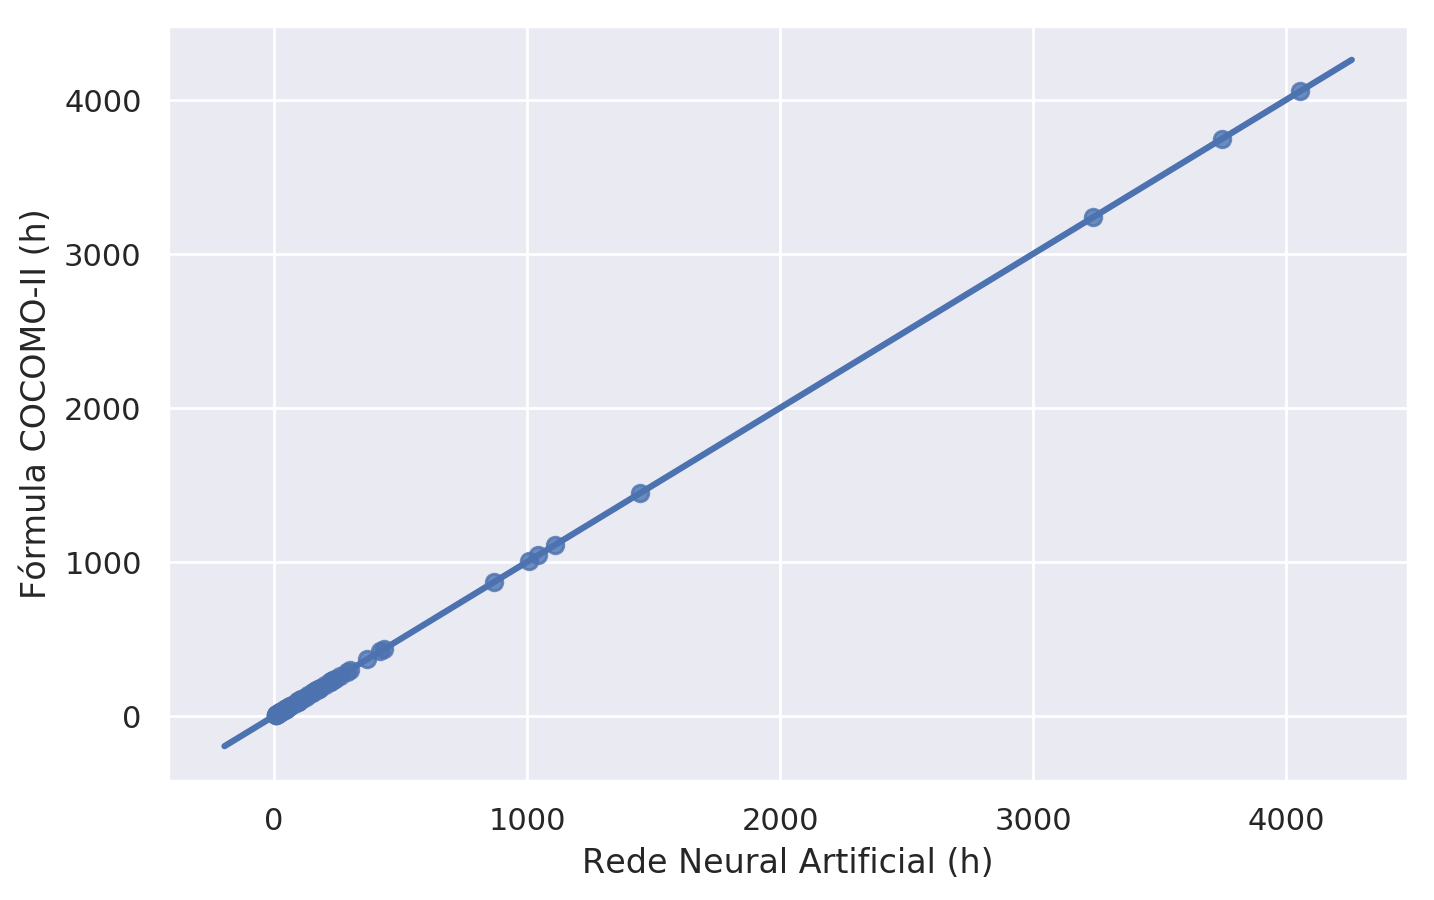

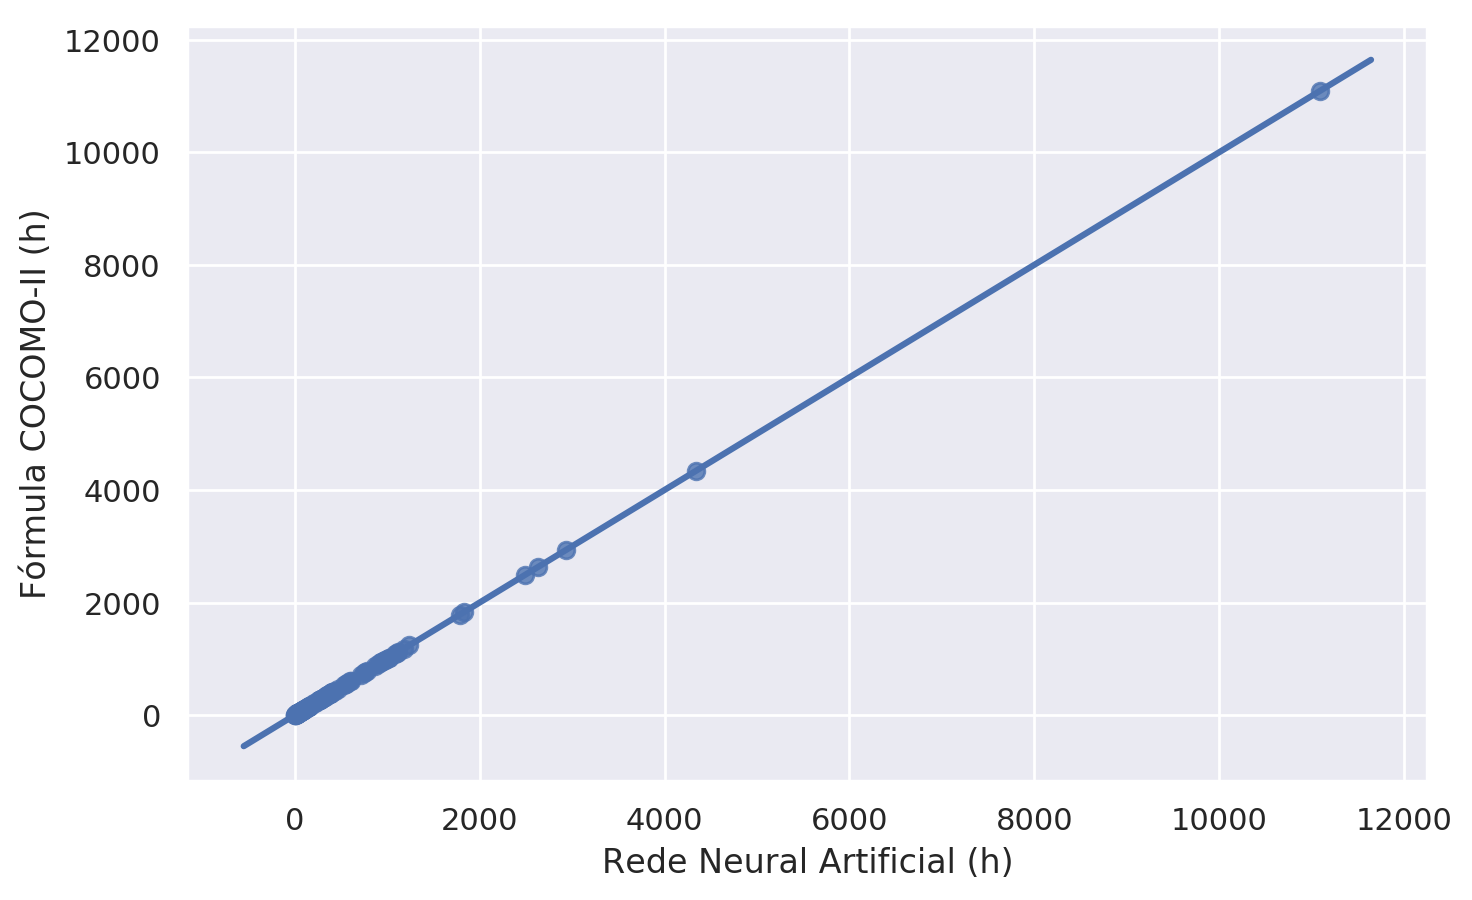

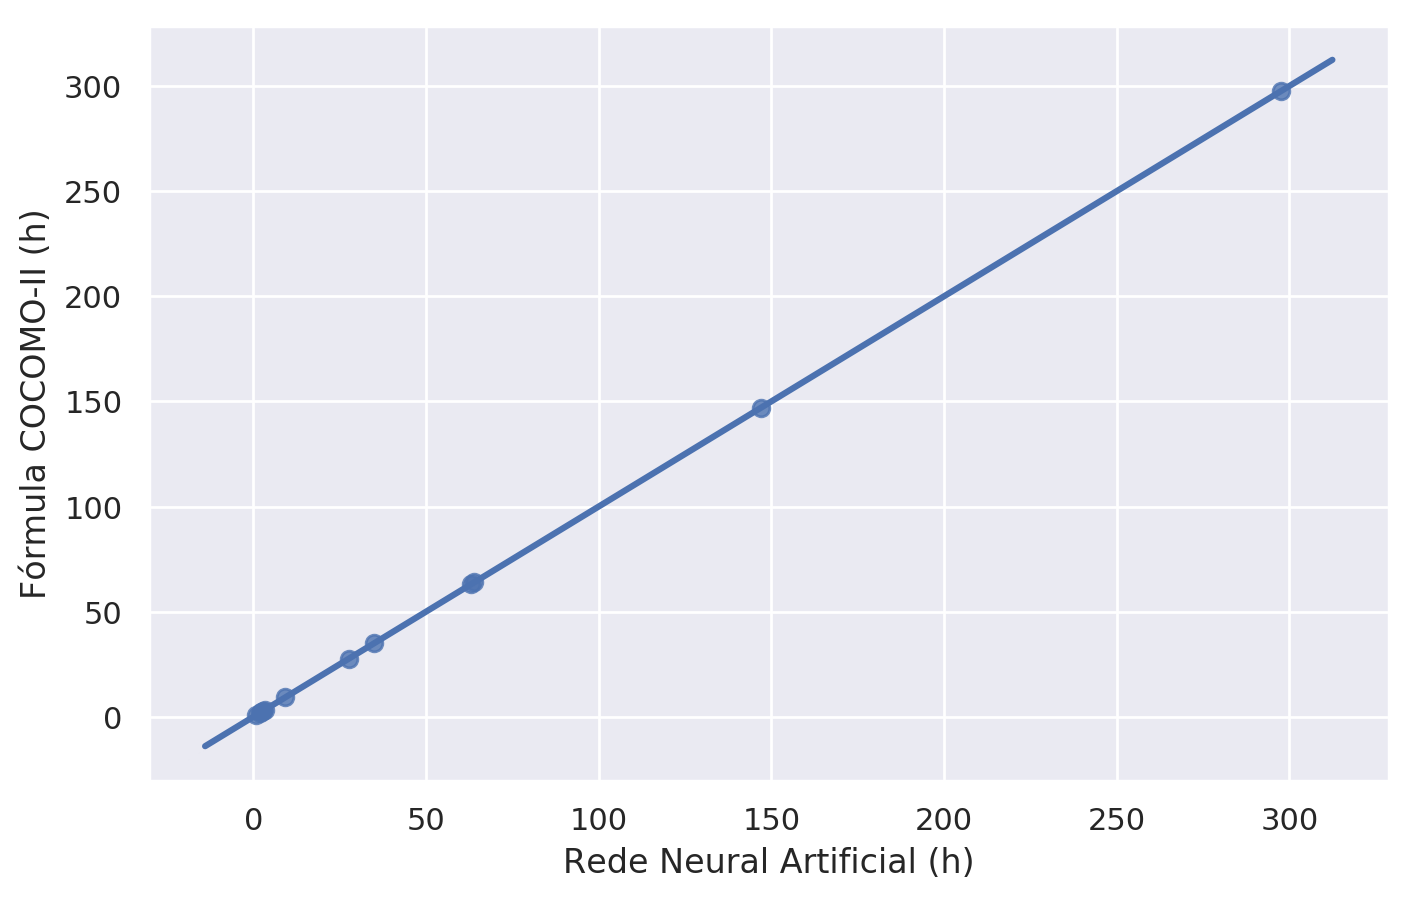

In [594]:
for base in ['cocomo81', 'cocomo_nasa2000', 'cocomo_sdr']:
    print('Base de dados:', base)
    entrada_one_hot = formata_dados_tabela(dados[base], dim_entrada, params)
    saida_rede = modelo_cocomo.predict(entrada_one_hot)
    saida_parametrica = estimativa_cocomo2000_tabela(dados[base], params, params_constantes.loc['A', 'Value'], params_constantes.loc['B', 'Value'])
    print('Diferença Relativa Máxima:', np.max(np.abs(((saida_rede - saida_parametrica)/saida_parametrica))))
    results = sm.OLS(saida_rede.ravel(),sm.add_constant(saida_parametrica.ravel())).fit()
    print(results.summary())
    figura = plt.figure(figsize=(8, 5), dpi=200)
    plt.xlabel("Rede Neural Artificial (h)")
    plt.ylabel("Fórmula COCOMO-II (h)")
    sns.regplot(saida_rede.ravel(), saida_parametrica.ravel())
    plt.plot()
    figura.savefig("resultados/figuras/"+base+"-rna-vs.pdf", bbox_inches='tight')